# Time Series Analysis

## APPLE STOCKS

### Imports

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px
from matplotlib import dates
import mplfinance as mpf
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objects as go

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot_mpl 
init_notebook_mode(connected=True)
cf.go_offline()

import requests
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df

import warnings
warnings.filterwarnings('ignore')

### Pandas Datetime Index

In [31]:
pd.date_range('2020-10-01', periods=15, freq='D')
pd.to_datetime(['10/01/2020', '10/02/2020'],
               format='%d/%m/%Y')
arr_1 = np.random.randint(10, 50, size=(3,3))
date_arr = pd.date_range('2020-01-01', periods = 3, 
                         freq = 'D')
df_1 = pd.DataFrame(arr_1, columns=['A', 'B', 'C'],
                   index=date_arr)
df_1
df_1.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

### Time Resampling (Apple Stocks)

<AxesSubplot:xlabel='AAPL_x'>

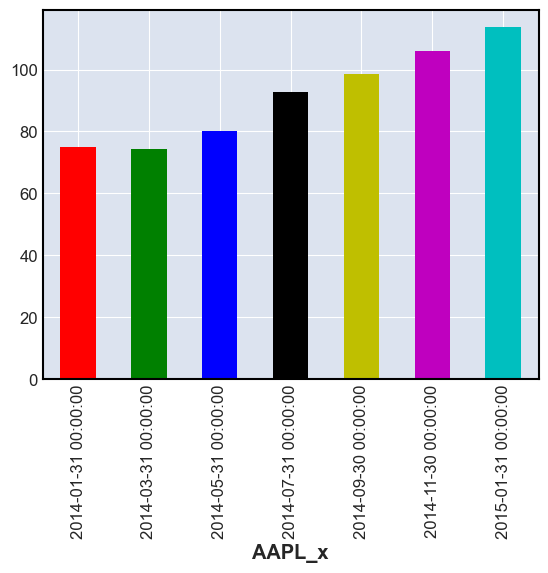

In [32]:
df_appl = pd.read_csv('appl.csv')
px.line(df_appl, x='AAPL_x', y='AAPL_y',
       labels = {'x':'Date', 'y':'Price'})
df_appl.head()
df_appl = pd.read_csv('appl.csv', index_col='AAPL_x', 
                     parse_dates=True)
df_appl

arr_2 = np.random.randint(86000000, 256000000, size=240)
df_appl['Volume'] = arr_2
df_appl.rename(columns={'AAPL_y':'Price'}, inplace=True)
df_appl

df_appl['Price'].resample(rule='2M').mean().plot.bar(color=list('rgbkymc'))

### Moving Averages

<AxesSubplot:xlabel='AAPL_x'>

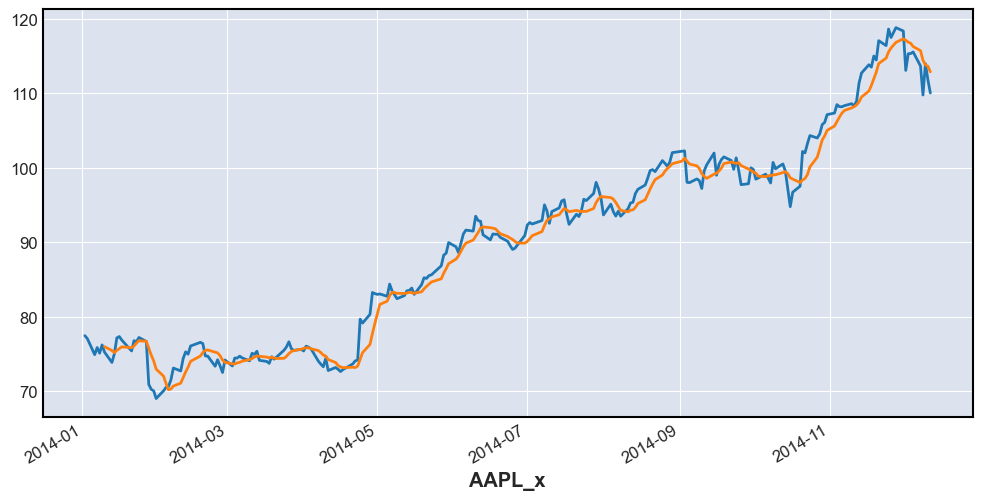

In [33]:
df_appl['Price'].plot(figsize=(12,6))
df_appl['Price'].rolling(window=7).mean().plot()
# window 7 is 7 days

<AxesSubplot:xlabel='AAPL_x'>

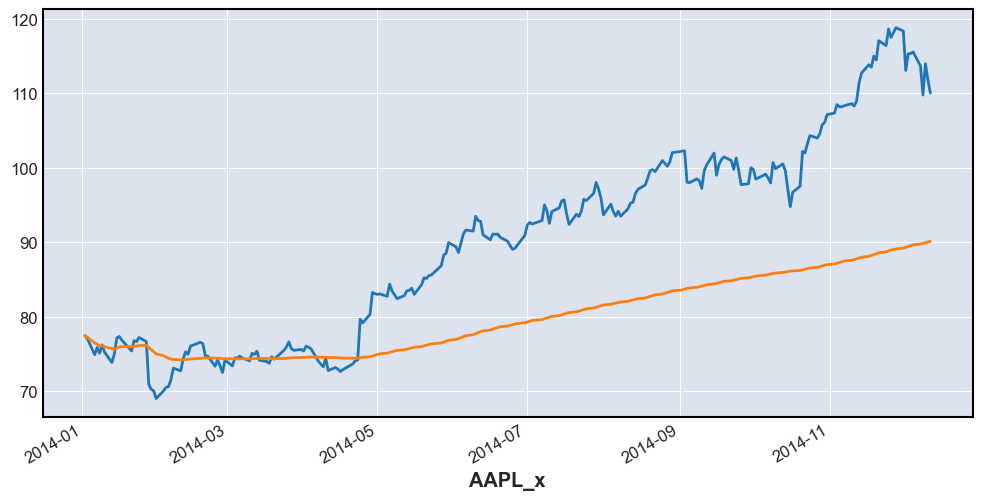

In [34]:
df_appl['Price'].plot(figsize=(12,6))
df_appl['Price'].expanding().mean().plot()

### Shifting Time Data

In [35]:
df_appl.shift(-1)

,Price,Volume
AAPL_x,,
2014-01-02,77.045575,210887210.0
2014-01-03,74.896972,96119261.0
2014-01-06,75.856461,127984277.0
2014-01-07,75.091947,141096910.0
2014-01-08,76.202632,173388385.0
...,...,...
2014-12-08,109.755497,227832059.0
2014-12-09,113.960331,129965731.0
2014-12-10,111.817477,92237777.0


## AMAZON STOCKS

### Setup the Data

In [36]:
df_2 = pd.read_csv('AMZN.csv', index_col= 'Date',
                  parse_dates=True)
df_2.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

### Visualizations

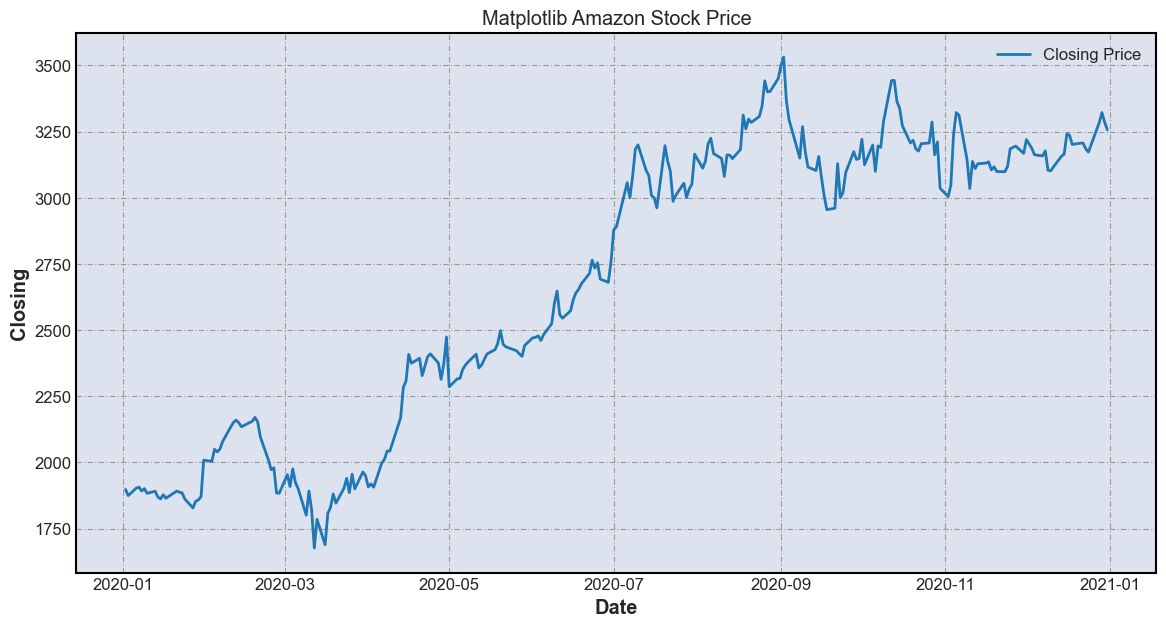

In [37]:
# Matplotlib
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing')
axes_1.set_title('Matplotlib Amazon Stock Price')
axes_1.plot(df_2.index, df_2['Close'], 
            label='Closing Price')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

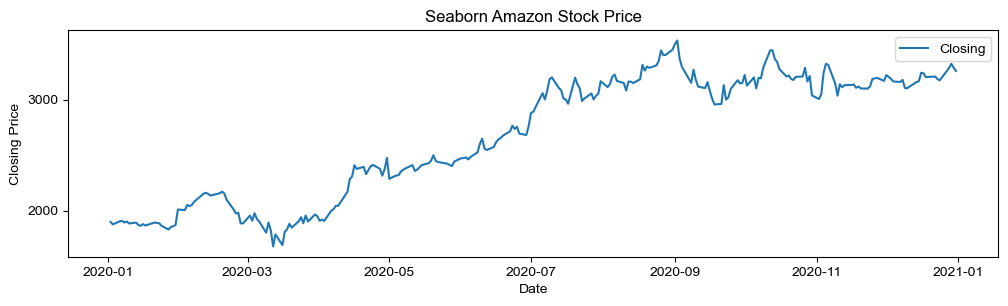

In [9]:
# Seaborn
fig_2 = plt.figure(figsize=(12, 3), dpi=100)
axes_2 = sns.lineplot(data=df_2, x=df_2.index, 
                     y='Close', label='Closing')
axes_2.set(xlabel='Date', ylabel='Closing Price')
axes_2.set_title('Seaborn Amazon Stock Price')
axes_2.legend(loc=0)
sns.set_style("darkgrid", {"axes.facecolor":".9"})
sns.set_context("notebook", font_scale=1.5, 
                rc={"lines.linewidth":2.5})

### Plotly

In [38]:
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(x=df_2.index, y=df_2['Close'],
                          mode='lines',
                           name='Closing Price'))
fig_3.update_layout(xaxis=dict(showgrid=True,
                              showline=True,
                              showticklabels=True),
                   yaxis=dict(showgrid=True,
                              showline=True,
                              showticklabels=True),
                   showlegend=True,
                   xaxis_title='Date',
                   yaxis_title='Closing Price',
                   title='Plotly Amazon Stock Price')

### Matplotlib Finance

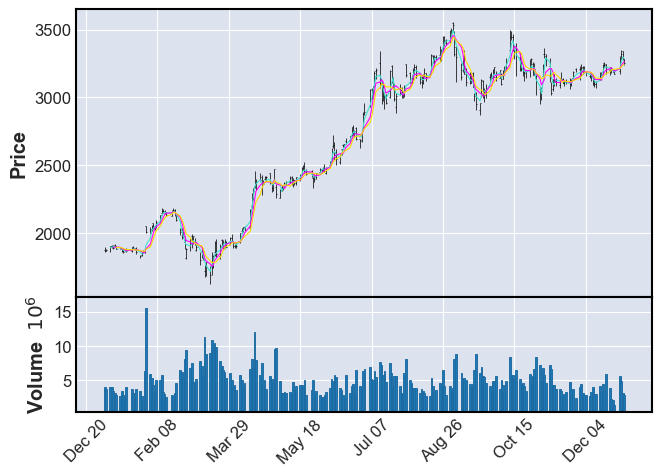

In [39]:
mpf.plot(df_2, type='ohlc', mav=(3,5,7), volume=True, 
        show_nontrading=True)

### Plotting Time Periods and Styling

In [43]:
df_2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971
...,...,...,...,...,...,...
2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941
2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961
2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000


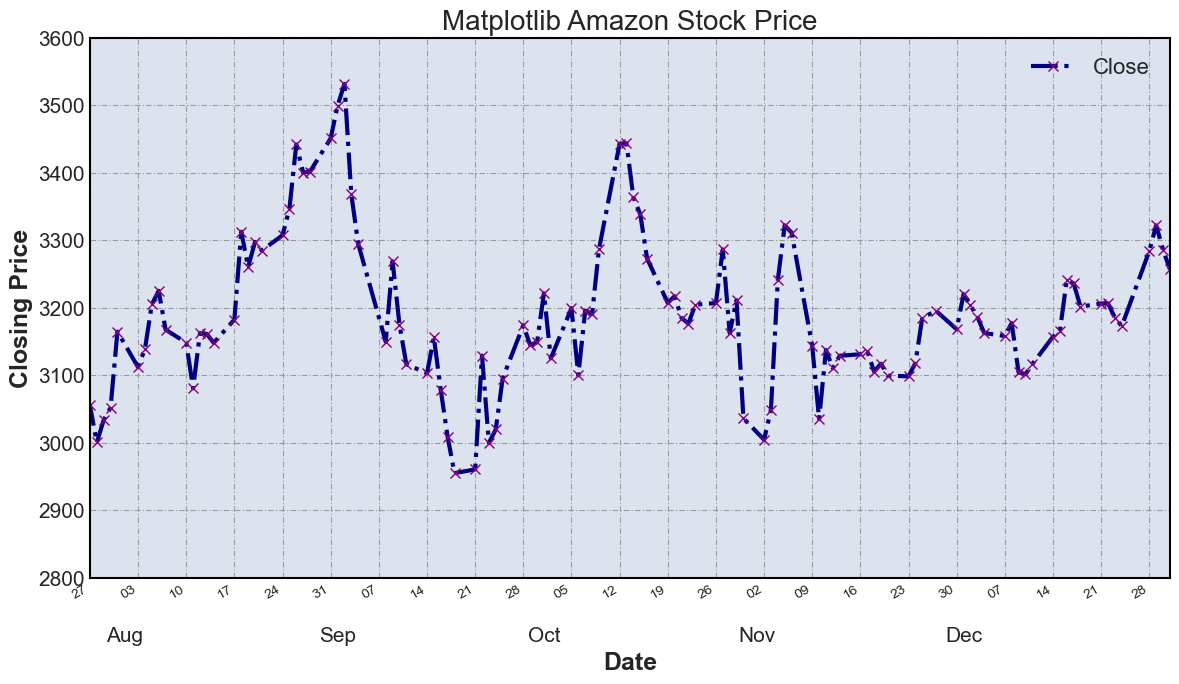

In [110]:
fig_1 = plt.figure(figsize=(10,6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_title('Matplotlib Amazon Stock Price', 
                 fontsize=20)

df_2['Close'].plot(figsize=(12,6),
                  xlim=['2020-07-27', '2020-12-31'],
                  ylim=[2800, 3600],
                  color='navy',
                  lw=3,
                  ls='-.',
                  marker='x',
                  markersize=7,
                  markerfacecolor='purple',
                  markeredgecolor='purple',
                  markeredgewidth=1)
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

axes_1.tick_params(axis="x", labelsize=10)
axes_1.tick_params(axis="y", labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.legend(loc=0, prop={'size':16})

axes_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

axes_1.xaxis.set_major_formatter(dates.DateFormatter('%d'))
axes_1.xaxis.set_minor_locator(dates.MonthLocator())

axes_1.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
axes_1.tick_params(axis='both', which='minor', labelsize=15)

## TIME SERIES ANALYSIS (diverse data)

### Trends

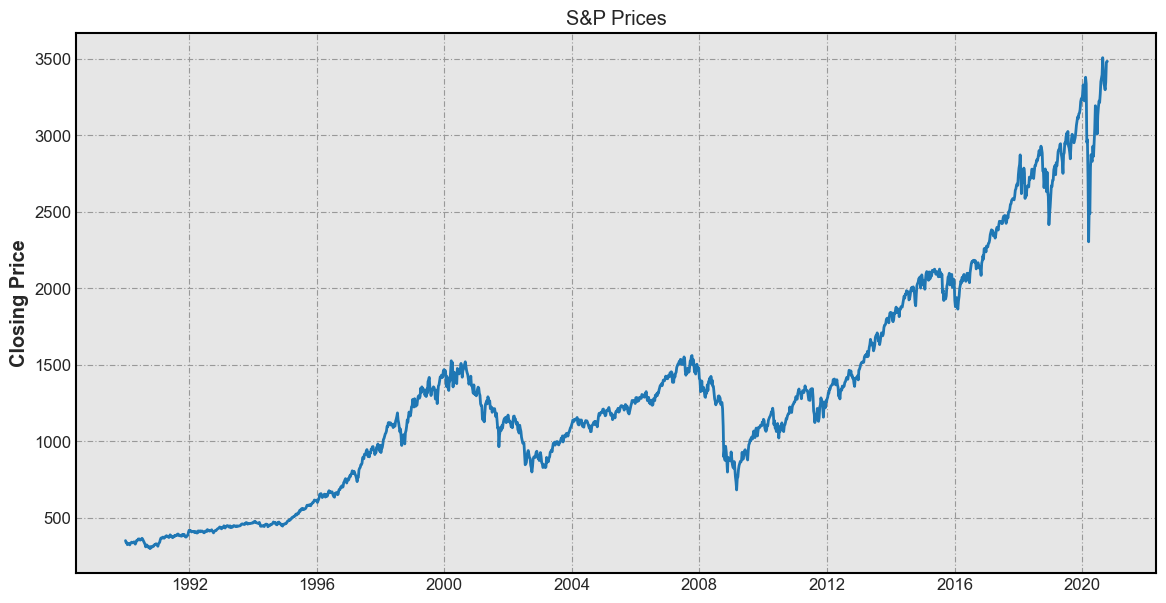

In [49]:
def print_chart(csv, title, col):
    df_1 = pd.read_csv(csv, index_col='Date', 
                       parse_dates=True)
    f_1 = plt.figure(figsize=(12,6), dpi=100)
    ax_1 = f_1.add_axes([0.0, 0.0, 0.9, 0.9])
    ax_1.set_ylabel('Closing Price')
    ax_1.set_title(title)
    ax_1.plot(df_1.index, df_1[col])
    ax_1.grid(True, color='0.6', dashes=(5,2,1,2))
    ax_1.set_facecolor((0.9, 0.9, 0.9))
    
print_chart('S&P.csv', 'S&P Prices', 'Close')

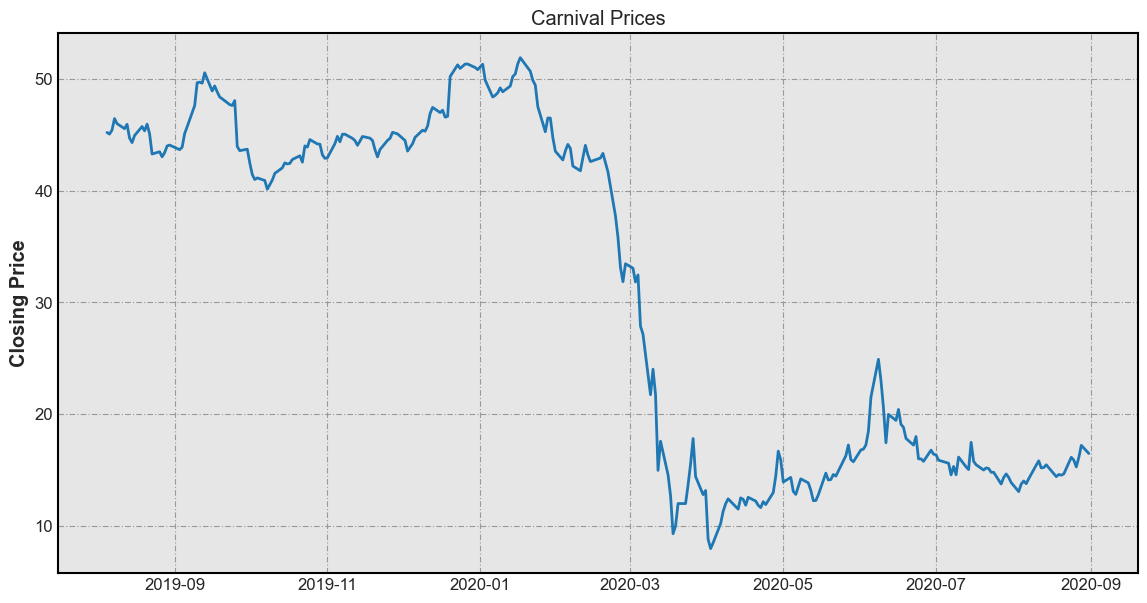

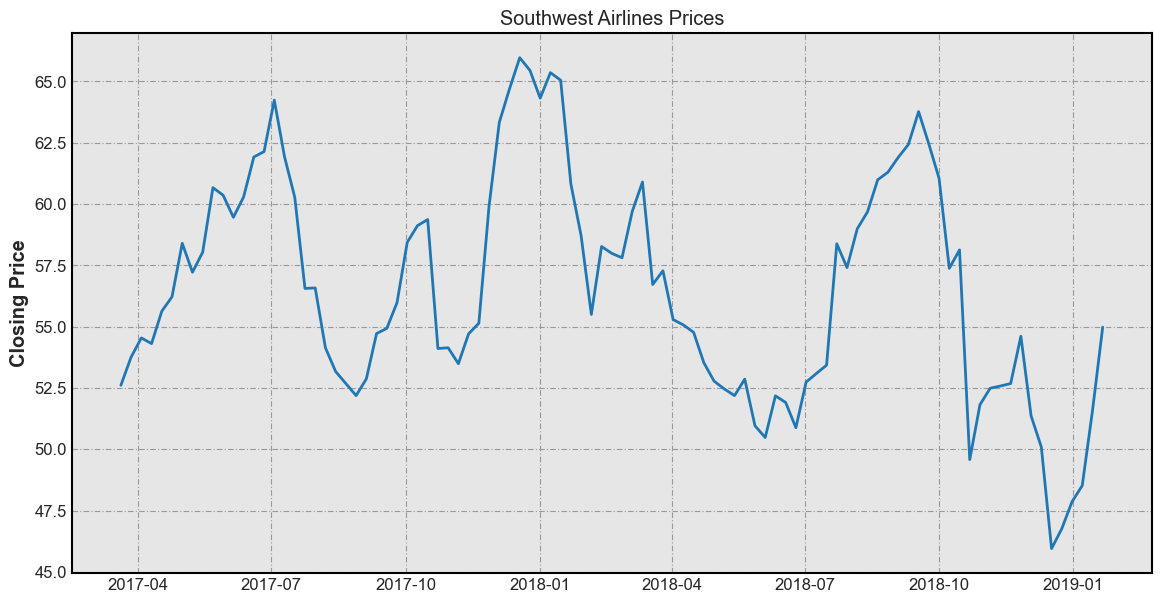

In [50]:
print_chart('CCL.csv', 'Carnival Prices', 'Close')
print_chart('LUV.csv', 'Southwest Airlines Prices', 'Close')

### Import Pittsburgh Weather

In [52]:
df_3 = pd.read_csv('PittsburghWeather.csv', index_col='Date',
                  parse_dates=True)
df_3 = df_3.dropna()
df_3 = df_3[df_3.index > '2000-01-01']
df_3

,tmax,tmin,prcp
Date,,,
2000-01-02,66.0,42.0,0.04
2000-01-03,62.0,52.0,0.58
2000-01-04,56.0,31.0,0.54
2000-01-05,32.0,24.0,0.03
2000-01-06,43.0,22.0,0.00
...,...,...,...
2019-12-27,57.9,41.0,0.02
2019-12-28,46.9,37.9,0.00
2019-12-29,55.9,39.9,0.52


<Axes:title={'center':'Pittsburgh Weather Data'}, xlabel='Date', ylabel='High Temperature'>

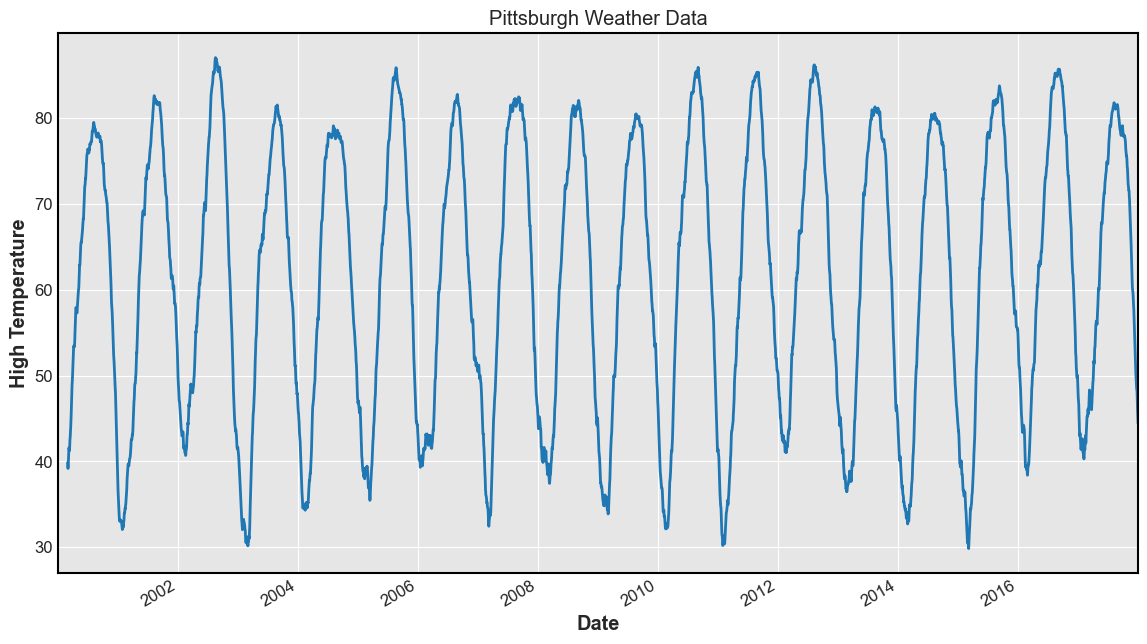

In [53]:
f_2 = plt.figure(figsize=(12,6), dpi=100)
ax_2 = f_2.add_axes([0.0, 0.0, 0.9, 0.9])
ax_2.set_ylabel('High Temperature')
ax_2.set_title('Pittsburgh Weather Data')
# df_3['tmax'].plot(xlim=['2000-01-02', '2017-12-30'])
ax_2.set_facecolor((0.9, 0.9, 0.9))

# cleaning data
df_3.rolling(window=60).mean()['tmax'].plot(xlim=['2000-01-02', 
                                            '2017-12-30'])

### ETS Decomposition

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
flight_df = sns.load_dataset('flights')
flight_df

flight_df['day'] = '01'
flight_df['month'] = pd.to_datetime(flight_df.month, 
                                    format = '%b').dt.month
flight_df['date'] = pd.to_datetime(flight_df[['year', 'month', 'day']])
flight_df.set_index('date', inplace=True)
flight_df.drop('year', axis=1, inplace=True)
flight_df.drop('month', axis=1, inplace=True)
flight_df.drop('day', axis=1, inplace=True)
flight_df

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='date'>

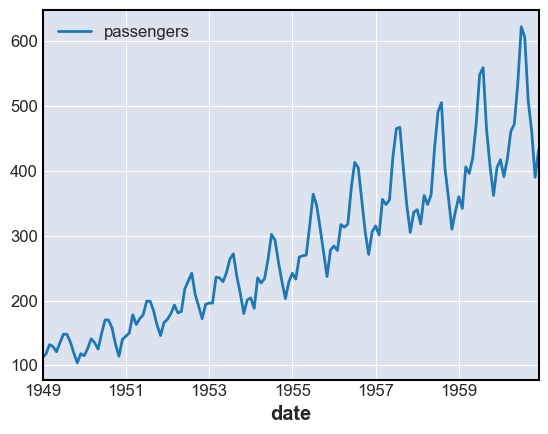

In [55]:
flight_df.plot()

### Additive Decomposition

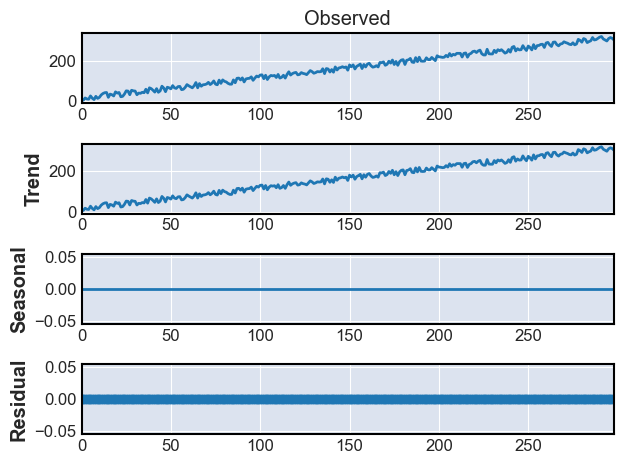

In [56]:
import random

# An additive model has a seasonality in which the width of cycles
# seem to be consistent. The trend also seems to follow a straight
# line
# I'll create a series with random values that increase to 300
add_df = [i + random.randrange(30) for i in range(1,300)]
sd = seasonal_decompose(add_df, model='additive', period=1)
sd.plot();

### Exponentially Weighted Moving Average

### EWMA adjust=True

\begin{equation*}
y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ... + (1 -
\alpha)^t x_0}{1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^t}
\end{equation*}

,passengers,EWMA 6
date,,
1949-01-01,112,112.000000
1949-02-01,118,115.500000
1949-03-01,132,122.917431
1949-04-01,129,125.266892
1949-05-01,121,123.769332
...,...,...
1960-08-01,606,538.549357
1960-09-01,508,529.820969
1960-10-01,461,510.157835


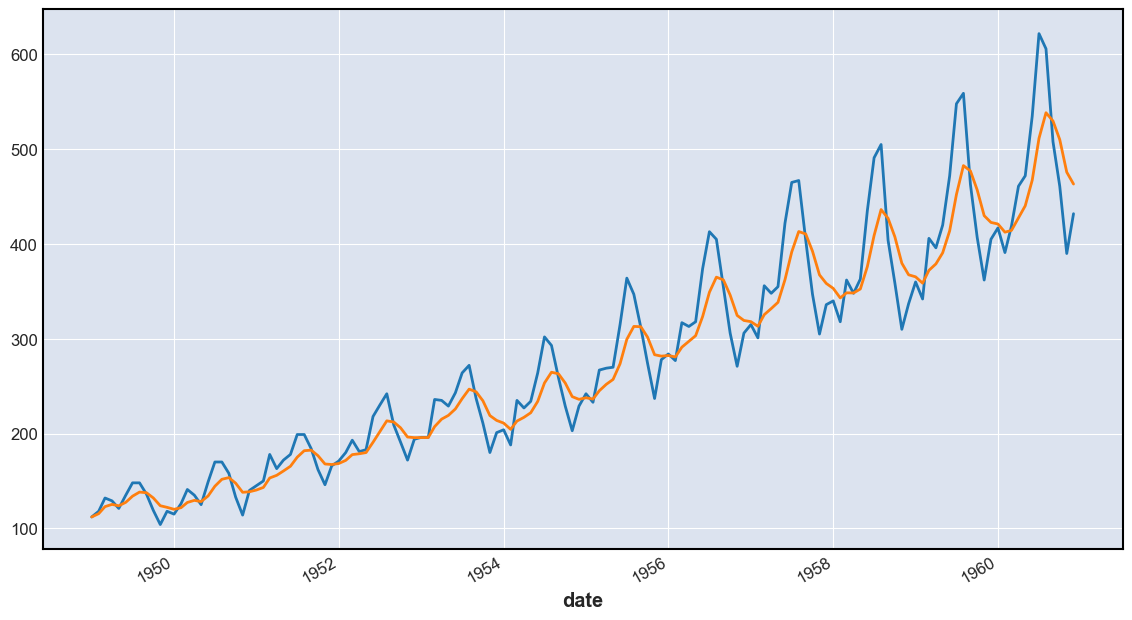

In [58]:
f_3 = plt.figure(figsize=(12,6), dpi=100)
ax_3 = f_3.add_axes([0.0, 0.0, 0.9, 0.9])
ax_3.plot(flight_df.index, flight_df['passengers'])

# Check for NaN in data
flight_df['passengers'].isnull().values.any()

flight_df['EWMA 6'] = flight_df['passengers'].ewm(span=6).mean()
# The seasonality has less effect at the beginning versus the end
# because we have weighted the later points
flight_df['EWMA 6'].plot()

flight_df


## FORECASTING

### Using Mean to Forecast

In [59]:
s_1 = pd.Series([52,60,64,53,59,55,64,58,55,52])
# forecasting with mean
s_1.mean()
# forecasting with mean of the last 3 numbers
np.mean(s_1.tail(3))
# weighted moving average - increasing percentage 
# of the last 4 values
s_wt = [0.1, 0.2, 0.3, 0.4] # adds up to value 1
s_1_la4 = s_1.tail(4)
ma = 0
for i in range(len(s_wt)):
    ma += s_1[i] * s_wt[i]
ma

57.6

### Single Exponential Smoothing

<AxesSubplot:xlabel='date'>

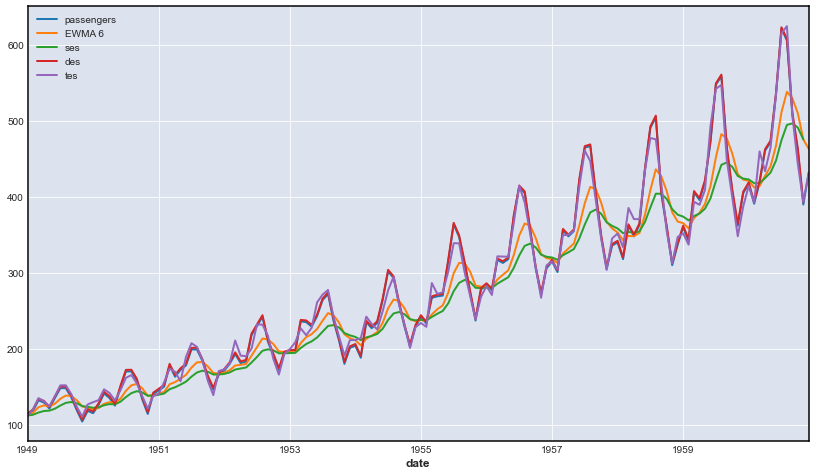

In [68]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# using single exponential smoothing

flight_df.index # freq None is not allowed for these computations
flight_df.index.freq = 'MS'
flight_df.index

span=12
alpha=2/(span+1)
model = SimpleExpSmoothing(flight_df['passengers'])
fit_model = model.fit(smoothing_level=alpha, 
                      optimized=False)
flight_df['ses'] = fit_model.fittedvalues.shift(-1)
flight_df.plot(figsize=(14, 8))

### Double Exponential Smoothing

<AxesSubplot:xlabel='date'>

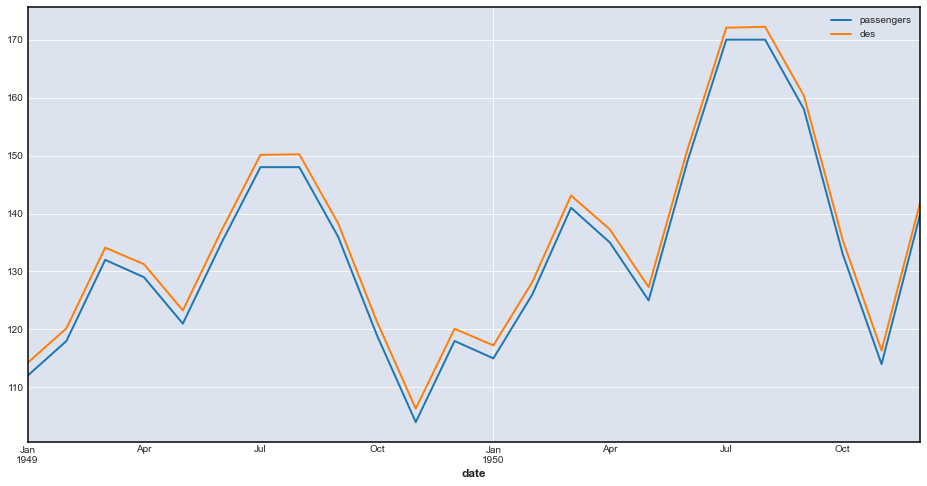

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_mod = ExponentialSmoothing(flight_df['passengers'], 
                               trend='add').fit()
flight_df['des'] = fit_mod.fittedvalues.shift(-1)
flight_df[['passengers', 'des']].iloc[:24].plot(figsize=(16,8))

### Triple Exp Smoothing - Seasonality and Holts Winter

<AxesSubplot:xlabel='date'>

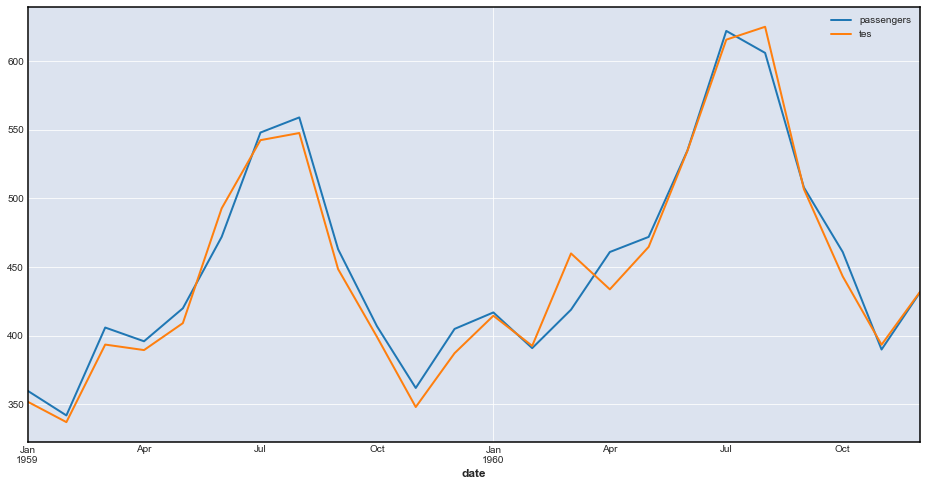

In [73]:
flight_df['tes'] = ExponentialSmoothing(flight_df['passengers'], 
                                       trend='add',
                                       seasonal='mul',
                                       seasonal_periods=12).fit().fittedvalues
flight_df[['passengers', 'tes']].iloc[-24:].plot(figsize=(16,8))

## ARIMA PREDICTIONS

### Making predictions with ARIMA

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Date', length=480, freq=None)

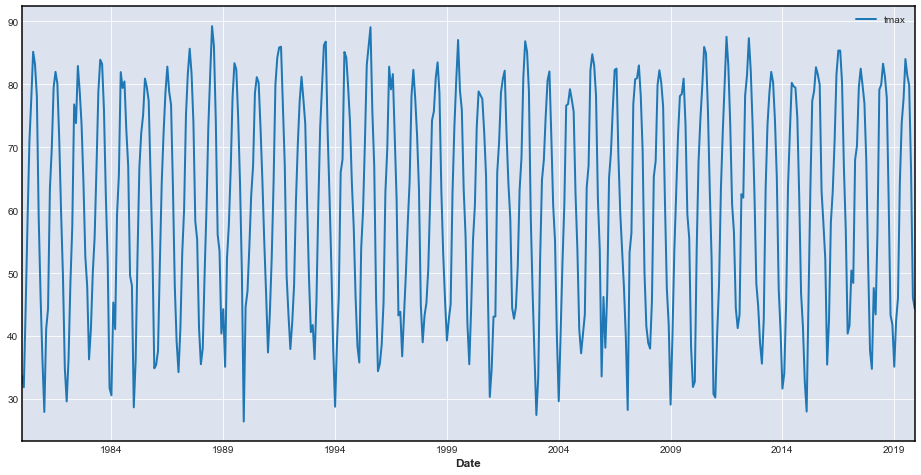

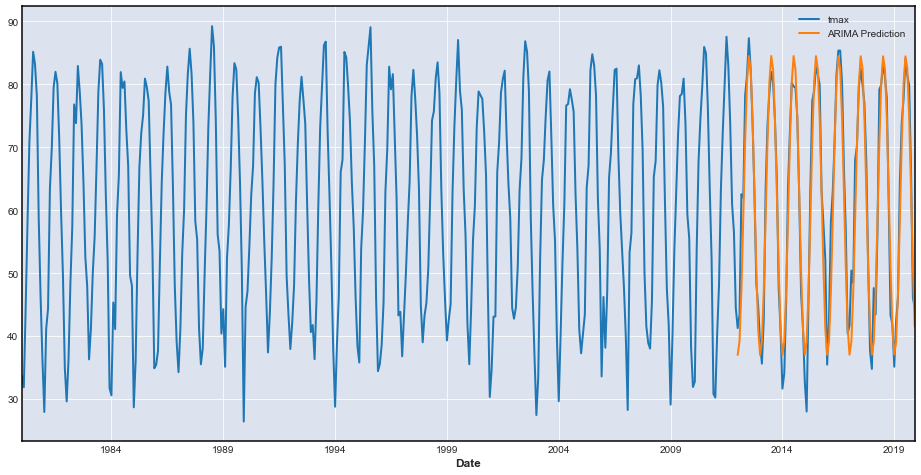

In [75]:
p_df = pd.read_csv('Pitt-M-Temp-80-pres.csv', 
                   index_col='Date', 
                   parse_dates= True)
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARIMAResults, ARMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

p_df.plot(figsize=(16,8))

# auto_arima(p_df, seasonal=True, trace=True).summary()

# ARIMA(2, 0, 2)
p_df.size # 480
train_df = p_df.iloc[:384]
test_df = p_df.iloc[384:]
mod = ARIMA(train_df, order=(2,0,2))
res = mod.fit()
# res.summary()

start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = res.predict(start, end).rename('ARIMA Prediction')
p_df.plot(figsize=(16,8), legend = True)
prediction.plot(legend=True)
p_df.index

### Stationarity
**Definition** 
A stationary data set does not change the way it changes over time. Basically it has a constant slope or rate of change.

**Why use them**
They are easy to analyze and they are required often during time series analysis.

### Checking Mean, Variance and Dickey Fuller

In [76]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    print(dfoutput)

Mean 1:  tmax    60.862379
dtype: float64
Mean 2:  tmax    61.27377
dtype: float64
Var 1:  tmax    291.969897
dtype: float64
Var 2:  tmax    294.172683
dtype: float64
Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


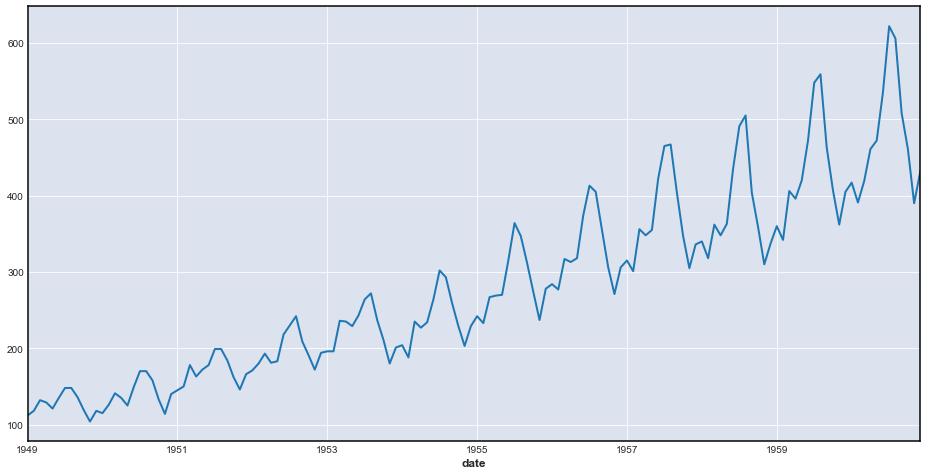

In [77]:
d_set = p_df
split = round(len(d_set)/2)
d_set1 = d_set[:split]
d_set2 = d_set[split:]
print("Mean 1: ", d_set1.mean())
print("Mean 2: ", d_set2.mean())
print("Var 1: ", d_set1.var())
print("Var 2: ", d_set2.var())

# adf_test(p_df)
# p_df.size

flight_df['passengers'].plot(figsize=(16,8))
adf_test(flight_df['passengers'])

### Making Data Stationary

Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
dtype: float64


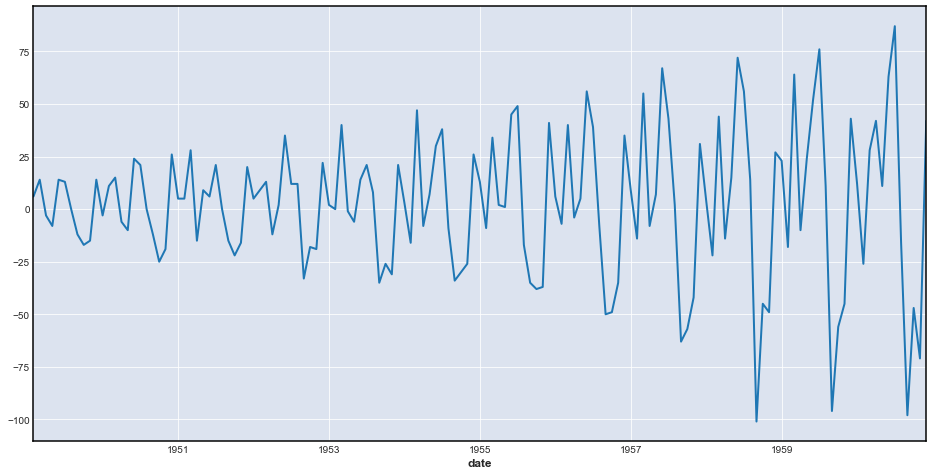

In [78]:
# diff_df = p_df.diff().dropna()
# diff_df.plot(figsize=(16,8))
# adf_test(diff_df)

diff2_df = flight_df['passengers'].diff().dropna()
diff2_df.plot(figsize=(16,8))
adf_test(diff2_df)

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(p_df, model = 'add')
# res.plot()
auto_arima(p_df, seasonal=False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3374.468, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5347.862, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3581.108, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4761.543, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3407.714, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3423.529, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3357.634, Time=0.50 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3377.559, Time=0.41 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=3087.187, Time=0.93 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=1.35 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=2823.485, Time=1.06 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.97 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=1.71 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=inf, Time=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  480
Model:               SARIMAX(4, 0, 5)   Log Likelihood               -1364.232
Date:                Wed, 08 Jun 2022   AIC                           2750.465
Time:                        14:35:08   BIC                           2796.377
Sample:                             0   HQIC                          2768.512
                                - 480                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     36.5786    125.085      0.292      0.770    -208.584     281.741
ar.L1          0.7123      6.282      0.113      0.910     -11.601      13.025
ar.L2          0.5558      9.564      0.058      0.954     -18.190      19.301
ar.L3         -0.6560      4.067     -0.161      0.872      -8.626       7.314
ar.L4         -0.2084      1.397     -0.149      0.881      -2.947       2.530
ma.L1         -0.4914      6.279     -0.078      0.938     -12.798      11.815
ma.L2         -0.6111      8.174     -0.075      0.940     -16.633      15.411
ma.L3          0.4216      2.620      0.161      0.872      -4.714       5.557
ma.L4          0.2705      1.050      0.258      0.797      -1.787       2.328
ma.L5          0.0927      0.714      0.130      0.897      -1.307       1.493
sigma2        16.5741      1.074     15.435      0.000      14.470      18.679
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.98
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.24
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Dickey-Fuller Test:
Test Statistic                -6.013137e+00
p-value                        1.556204e-07
#Lags Used                     1.800000e+01
Number of Observations Used    4.610000e+02
dtype: float64


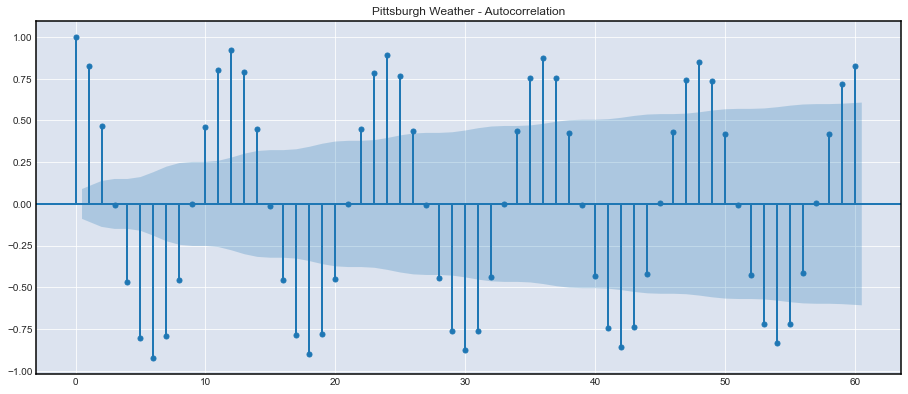

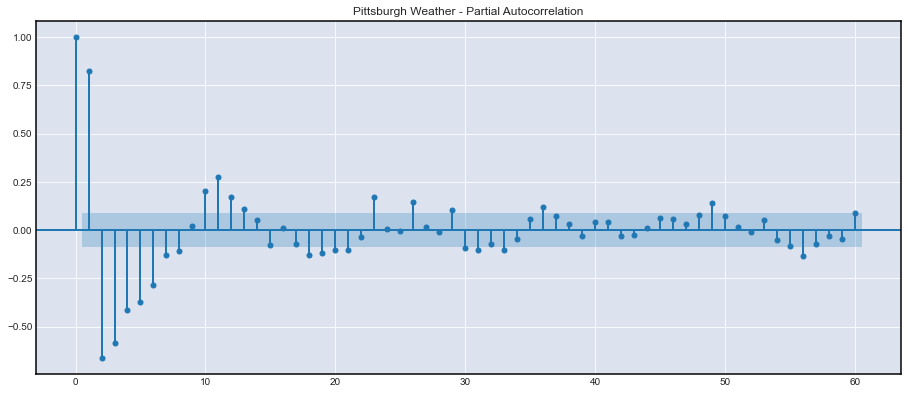

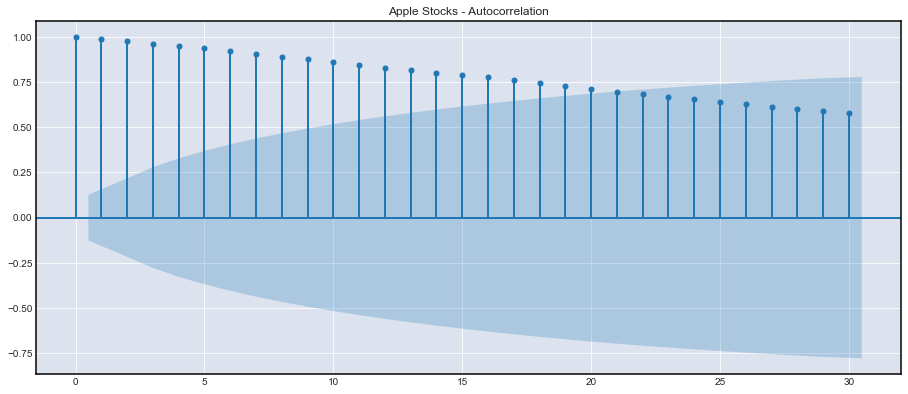

In [89]:
adf_test(p_df)# DF test - p value less than .05 = we don't need to make the difference

plot_acf(p_df, lags=60, title="Pittsburgh Weather - Autocorrelation").set_size_inches(15.5, 6.5);

plot_pacf(p_df, lags=60, title="Pittsburgh Weather - Partial Autocorrelation").set_size_inches(15.5, 6.5);

appl_df = pd.read_csv('appl2.csv', index_col = 'Date',
                     parse_dates=True)

plot_acf(appl_df, lags=30, title="Apple Stocks - Autocorrelation").set_size_inches(15.5, 6.5);